In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [5]:
raw_csv_data = pd.read_csv("Absenteeism-data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Absenteeism-data.csv'

In [19]:
type(raw_csv_data)

pandas.core.frame.DataFrame

In [20]:
df = raw_csv_data.copy()

In [21]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 5
display(df)
df.info()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2
699,15,28,31/05/2018,291,31,40,237.656,25,1,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [22]:
df = df.drop(['ID'], axis = 1)


In [23]:
########## 'Reason for Absence' ##################
##################################################
df['Reason for Absence'].min()
df['Reason for Absence'].max()
pd.unique(df['Reason for Absence'])
df['Reason for Absence'].unique()
len(df['Reason for Absence'].unique())
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [24]:
########## '.get_dummies()' ######################
##################################################
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns

reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns

#reason_columns['check'] = reason_columns.sum(axis=0)
#reason_columns
#reason_columns['check'].sum(axis=0)
#reason_columns['check'].unique()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,check
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1
699,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1


In [25]:
# df.columns.values
# reason_columns.columns.values
df = df.drop(['Reason for Absence'], axis = 1)
# df

# reason_columns.loc[:, 1:14].max(axis=1)
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [26]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
698,24/05/2018,235,16,32,237.656,25,3,0,0,2
699,31/05/2018,291,31,40,237.656,25,1,1,1,2


In [27]:
########## Concatenate Column Values #############
##################################################
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,False,False,False,True
699,31/05/2018,291,31,40,237.656,25,1,1,1,2,False,False,False,True


In [28]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [29]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [30]:
#

In [31]:
df.columns = column_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,1
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,1
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [32]:
########## Create a Checkpoint ###################
##################################################


df_reason_mod = df.copy()
df_reason_mod

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,False,False,False,True
699,31/05/2018,291,31,40,237.656,25,1,1,1,2,False,False,False,True


In [33]:
########## 'Date' ################################
##################################################


#df_reason_mod['Date']
# df_reason_mod['Date'][0]
# type(df_reason_mod['Date'][0])

df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')
# df_reason_mod['Date']
# type(df_reason_mod['Date'])
# df_reason_mod.info()


In [34]:
df_reason_mod['Date']

0     2015-07-07
1     2015-07-14
         ...    
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [35]:
df_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [36]:
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d-%m-%Y')
df_reason_mod['Date']

0     2015-07-07
1     2015-07-14
         ...    
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [38]:
########## Extract the Month Value ###############
##################################################
# df_reason_mod['Date'][0]
# df_reason_mod['Date'][0].month
list_months = []
# list_months

# df_reason_mod.shape

for i in range(df_reason_mod.shape[0]):
    list_months.append(df_reason_mod['Date'][i].month)
    
# list_months
# len(list_months)
df_reason_mod['Month Value'] = list_months
# df_reason_mod.head(20)

In [40]:
df_reason_mod

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2018-05-24,235,16,32,237.656,25,3,0,0,2,False,False,False,True,5
699,2018-05-31,291,31,40,237.656,25,1,1,1,2,False,False,False,True,5


In [41]:
df_reason_mod['Date'][699].weekday()

3

In [42]:
df_reason_mod['Date'][699]

Timestamp('2018-05-31 00:00:00')

In [44]:
def date_to_weekday(date_value):
 return date_value.weekday()

In [45]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [46]:
df_reason_mod

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2018-05-24,235,16,32,237.656,25,3,0,0,2,False,False,False,True,5,3
699,2018-05-31,291,31,40,237.656,25,1,1,1,2,False,False,False,True,5,3


In [47]:
df_reason_mod.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,1,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [48]:
df_reason_mod['Year']=df_reason_mod['Date'].dt.year

In [49]:
df_reason_mod['Year']

0      2015
1      2015
       ... 
698    2018
699    2018
Name: Year, Length: 700, dtype: int32

In [50]:
df_reason_mod.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Year
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1,2015
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7,1,2015
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2,2015
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,1,7,3,2015
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3,2015


In [51]:
df_reason_mod['Date']=pd.to_datetime(df_reason_mod['Date'])
df_reason_mod['day_name']=df_reason_mod['Date'].dt.day_name()

In [52]:
df_reason_mod['day_name']

0       Tuesday
1       Tuesday
         ...   
698    Thursday
699    Thursday
Name: day_name, Length: 700, dtype: object

In [53]:
df_reason_mod.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Year,day_name
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1,2015,Tuesday
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7,1,2015,Tuesday
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2,2015,Wednesday
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,1,7,3,2015,Thursday
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3,2015,Thursday


In [54]:
df_reason_mod=df_reason_mod.drop(['Date'],axis=1)

In [55]:
df_reason_mod.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Year,day_name
0,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1,2015,Tuesday
1,118,13,50,239.554,31,1,1,0,0,False,False,False,1,7,1,2015,Tuesday
2,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2,2015,Wednesday
3,279,5,39,239.554,24,1,2,0,4,True,False,False,1,7,3,2015,Thursday
4,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3,2015,Thursday


In [56]:
df_reason_mod.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1',
       'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week', 'Year', 'day_name'], dtype=object)

In [70]:
column_names_upd=['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [71]:
 df_reason_mod = df_reason_mod[column_names_upd]
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,1,2,1,4
1,False,False,False,1,7,1,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,7,2,179,51,38,239.554,31,1,0,0,2
3,True,False,False,1,7,3,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,7,3,289,36,33,239.554,30,1,2,1,2


In [59]:
df_reason_mod.shape

(700, 15)

In [60]:
 df_reason_date_mod = df_reason_mod.copy()
df_reason_date_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,1,2,1,4
1,False,False,False,1,7,1,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,7,2,179,51,38,239.554,31,1,0,0,2
3,True,False,False,1,7,3,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,7,3,289,36,33,239.554,30,1,2,1,2


In [62]:
df_reason_date_mod['Education'].unique()
df_reason_date_mod['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [63]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})

In [64]:
df_reason_date_mod['Education'].unique()
df_reason_date_mod['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [65]:
df_cleaned = df_reason_date_mod.copy()
df_cleaned.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,0,2,1,4
1,False,False,False,1,7,1,118,13,50,239.554,31,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,False,False,True,1,7,0,155,12,34,239.554,25,0,2,0,40
9,False,False,False,True,7,0,235,11,37,239.554,29,1,1,1,8


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


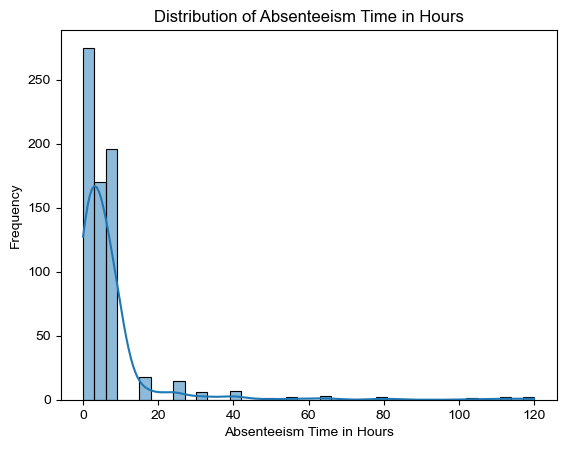

In [67]:
sns.histplot(df_cleaned['Absenteeism Time in Hours'],bins = 40, kde=True)
sns.set_style('whitegrid')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Absenteeism Time in Hours')
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


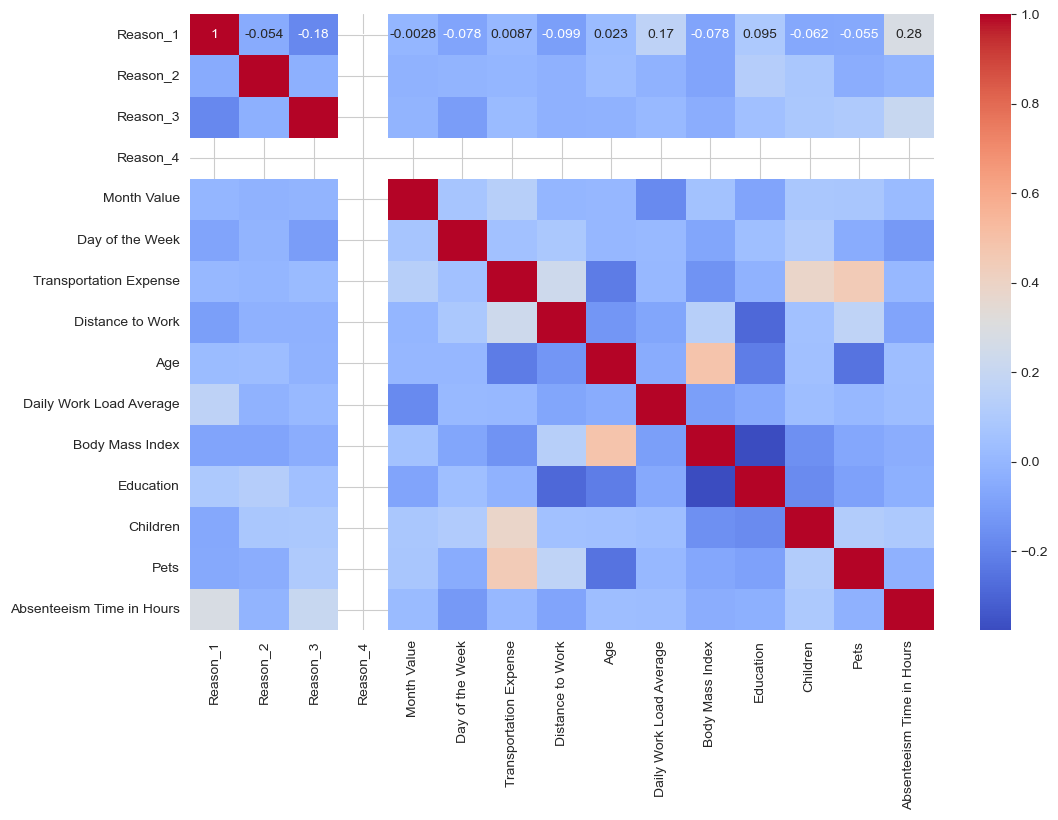

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

In [1]:
sns.barplot(x='Day of the Week', y='Absenteeism Time in Hours', data=df_cleaned)
plt.show()

NameError: name 'sns' is not defined

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

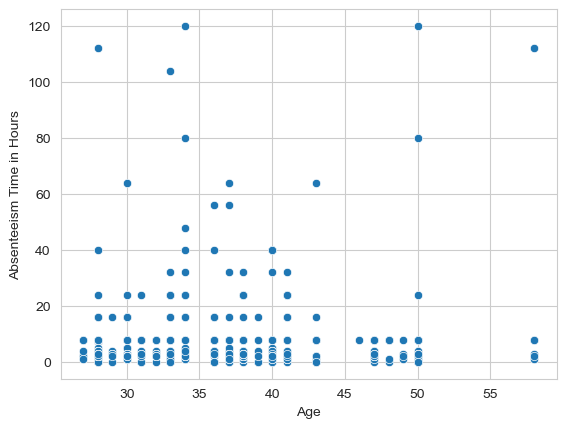

In [74]:
sns.scatterplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Education', ylabel='Absenteeism Time in Hours'>

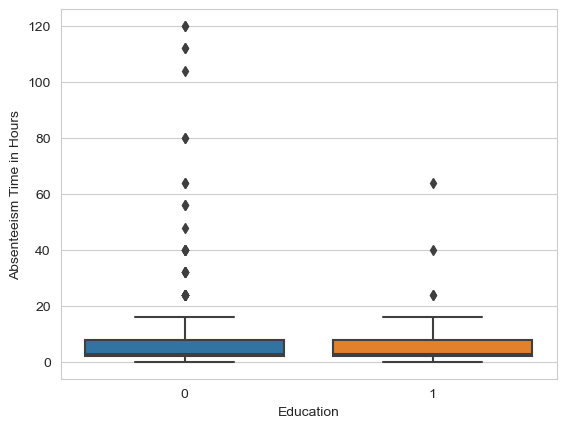

In [75]:
sns.boxplot(x='Education', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Month Value', ylabel='Absenteeism Time in Hours'>

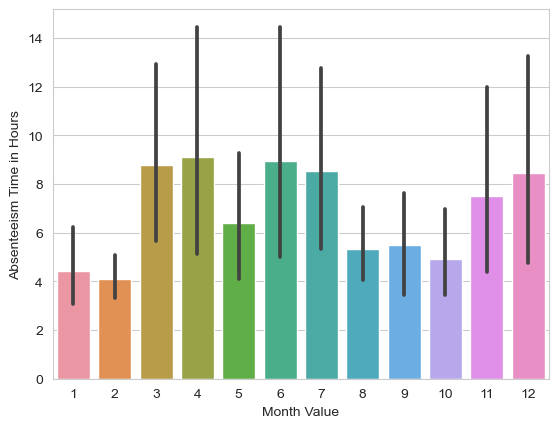

In [76]:
sns.barplot(x='Month Value', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Distance to Work', ylabel='Absenteeism Time in Hours'>

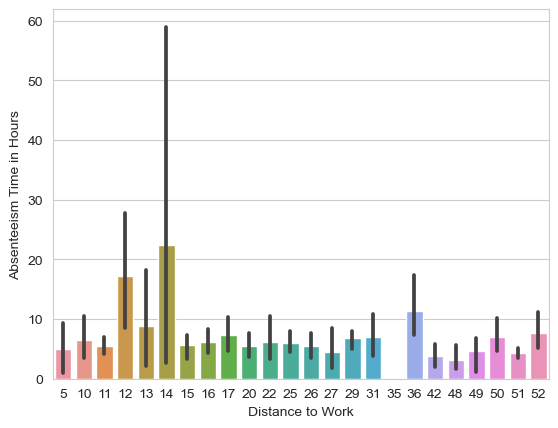

In [77]:
sns.barplot(x='Distance to Work', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

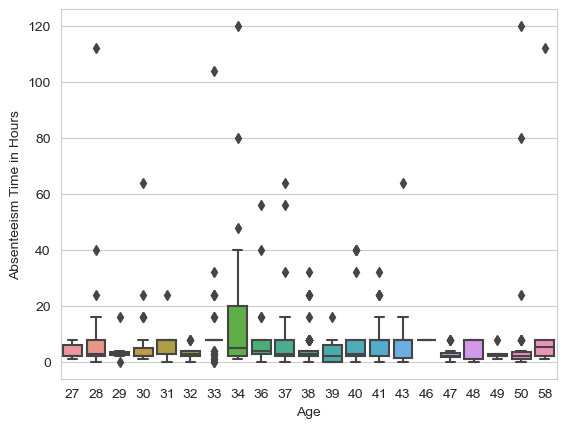

In [78]:
sns.boxplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

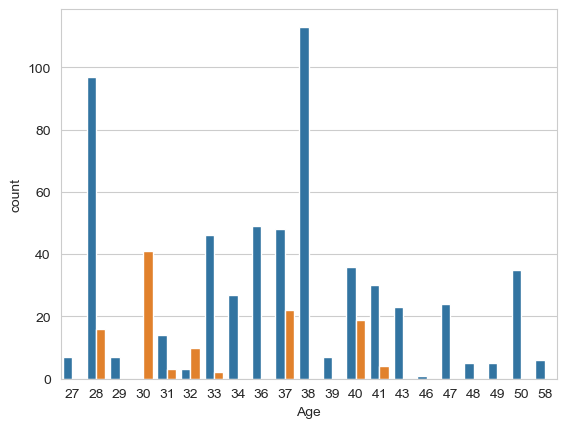

In [82]:
sns.countplot(x='Age', data=df_cleaned, hue='Education')

<Axes: xlabel='Education', ylabel='Absenteeism Time in Hours'>

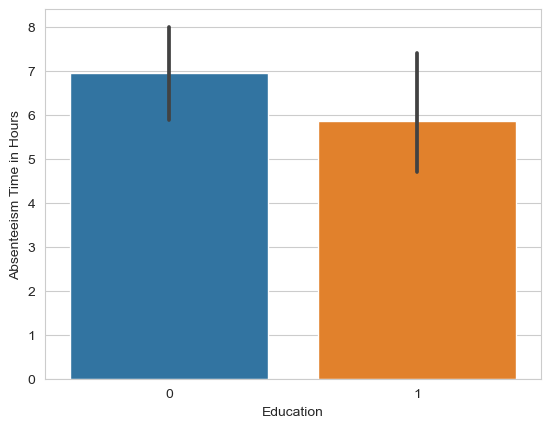

In [80]:
sns.barplot(x='Education', y='Absenteeism Time in Hours', data=df_cleaned)

In [83]:
monthly_absenteeism = df_cleaned.groupby('Month Value')['Absenteeism Time in Hours'].mean().reset_index()
monthly_absenteeism

,Month Value,Absenteeism Time in Hours
0,1,4.440000
1,2,4.083333
...,...,...
10,11,7.507937
11,12,8.448980


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month Value', ylabel='Absenteeism Time in Hours'>

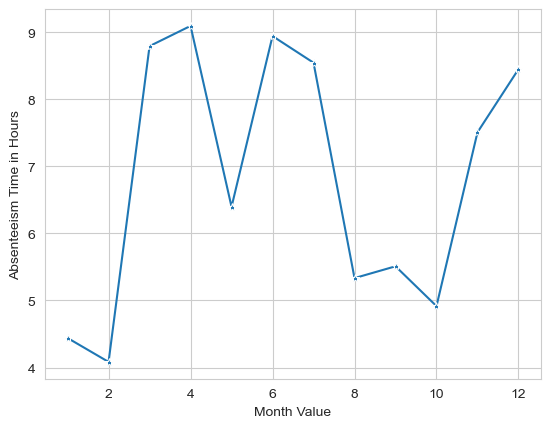

In [84]:
sns.lineplot(x='Month Value', y='Absenteeism Time in Hours', data=monthly_absenteeism, marker='*')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Day of the Week', ylabel='Absenteeism Time in Hours'>

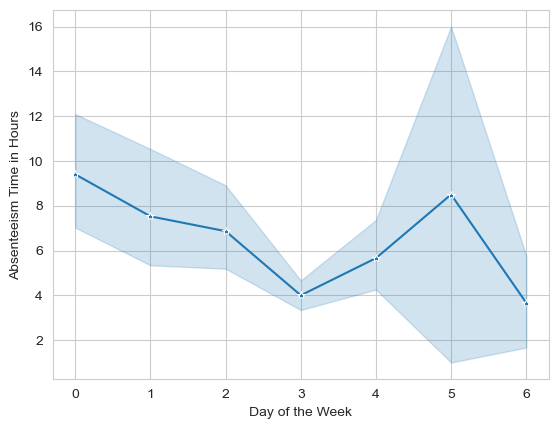

In [85]:
sns.lineplot(x='Day of the Week', y='Absenteeism Time in Hours', data=df_cleaned, marker='*')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C

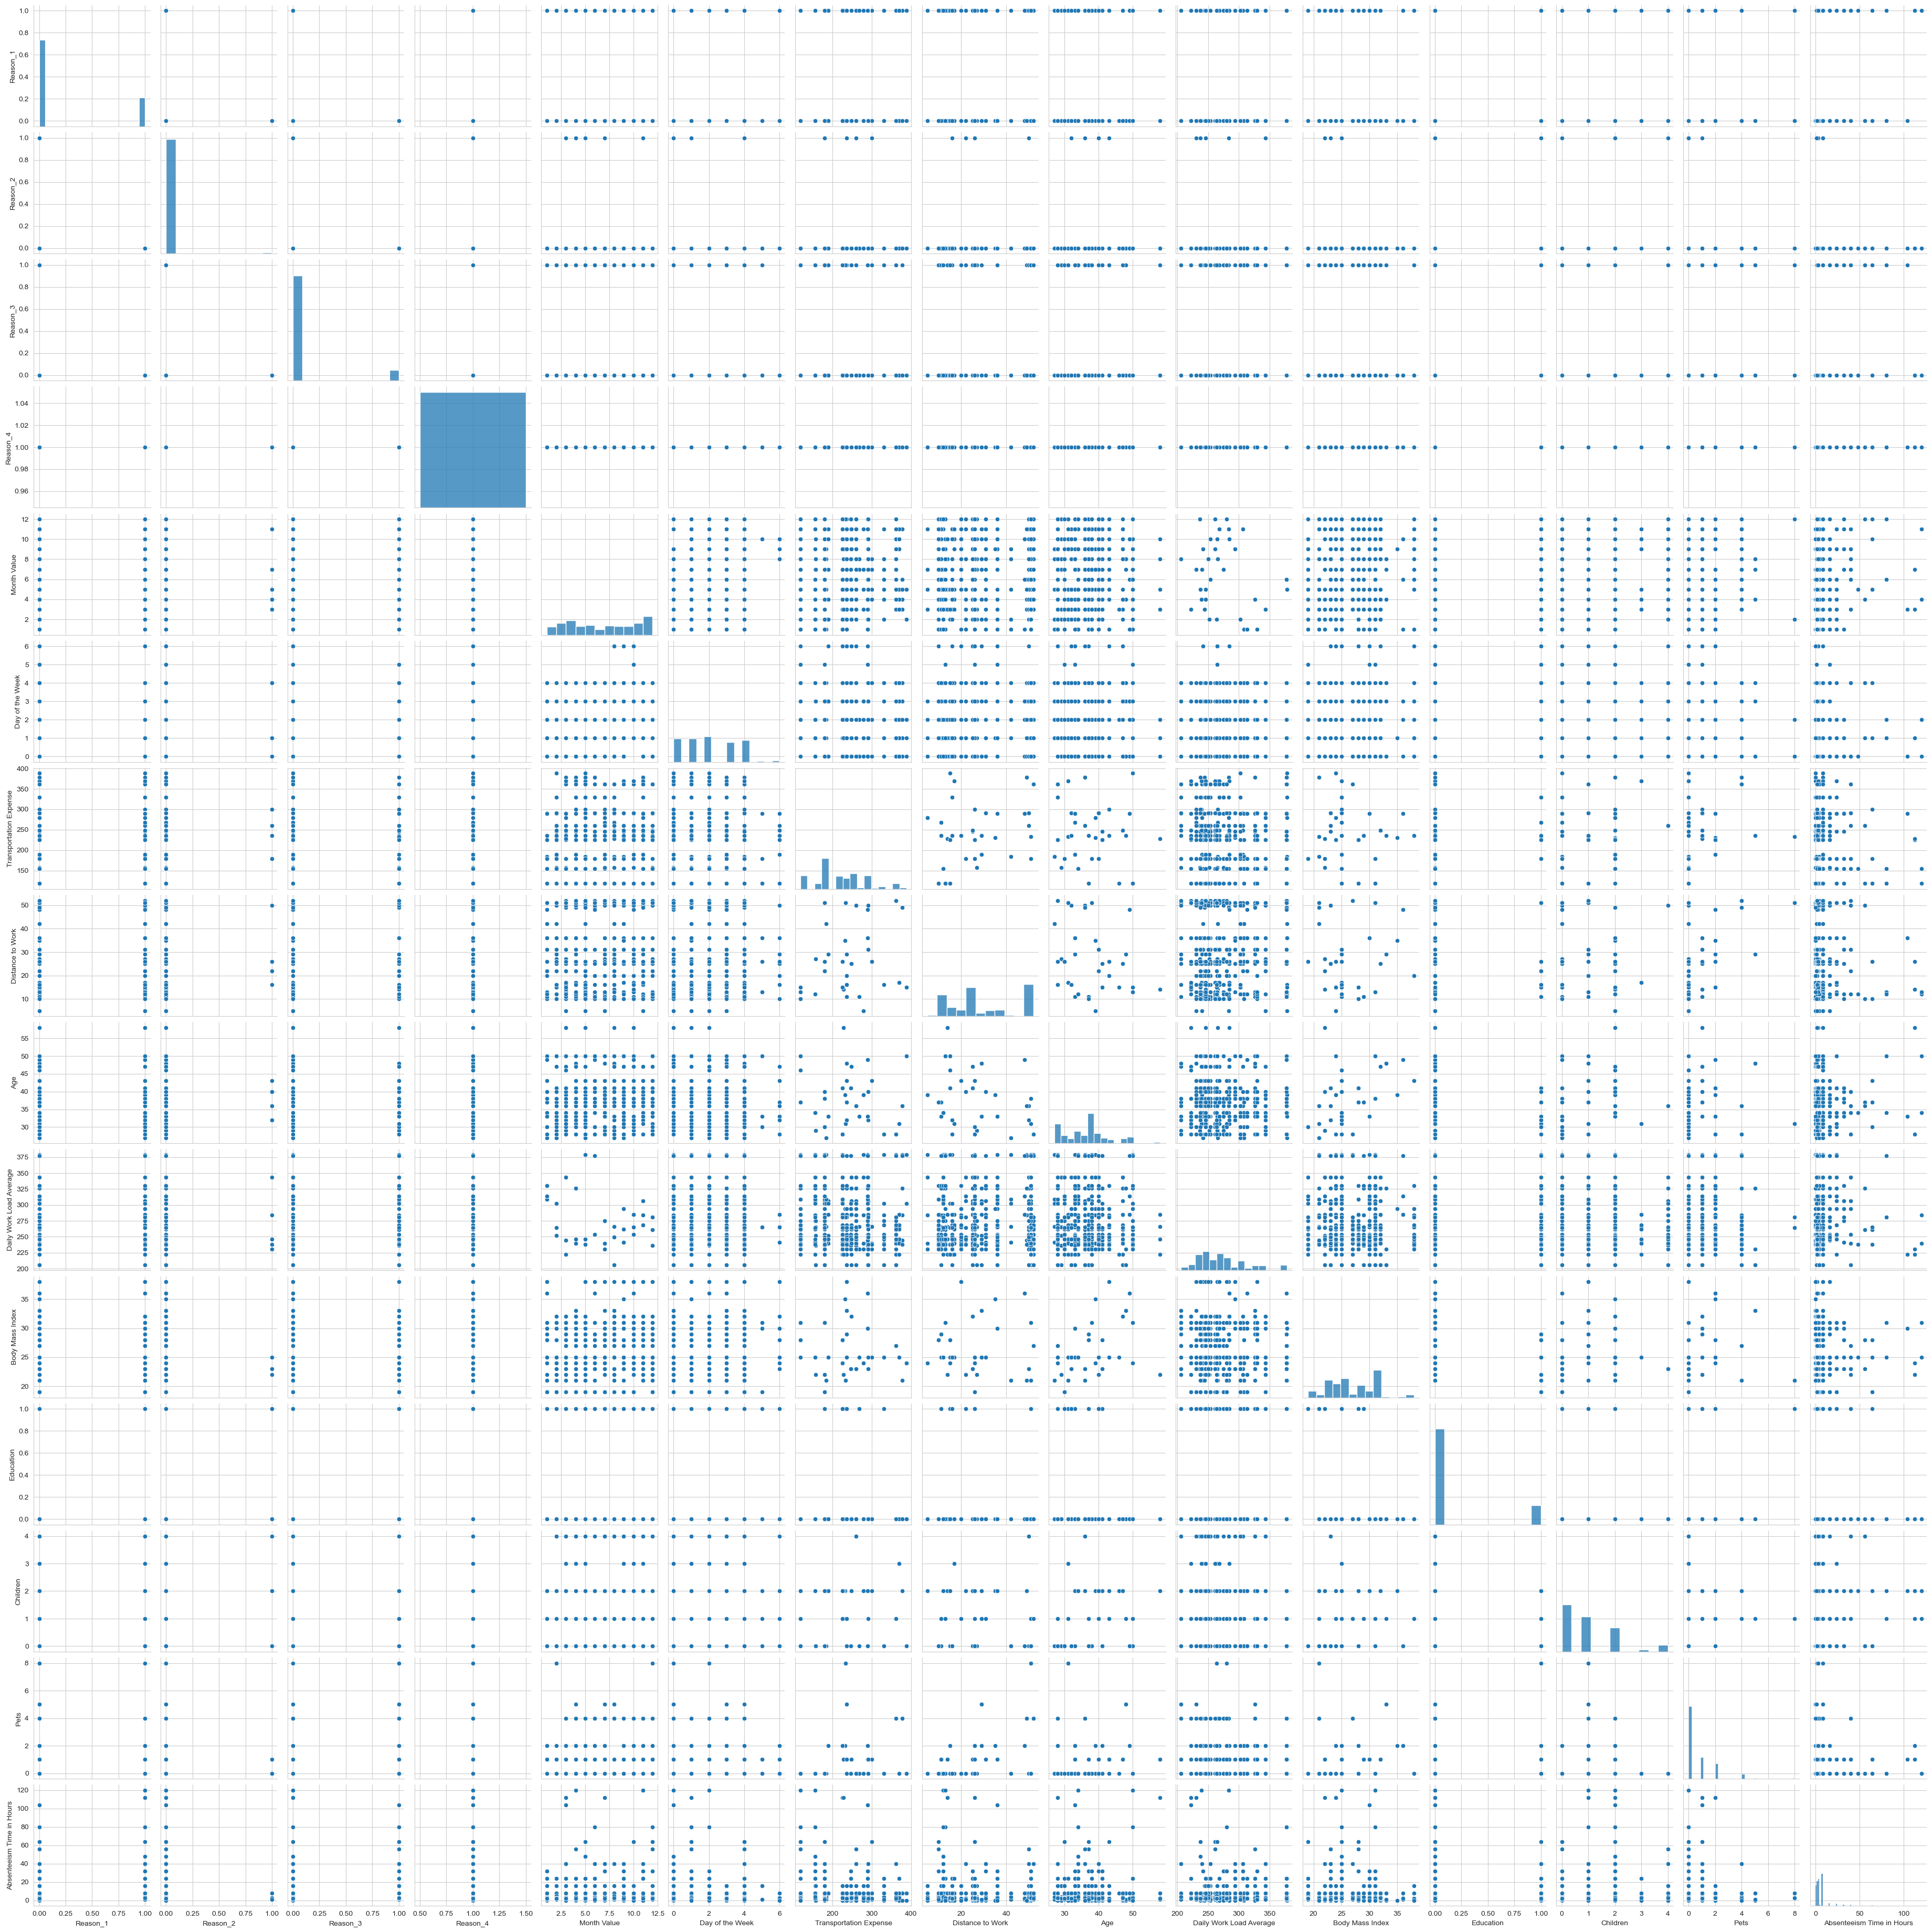

In [86]:
sns.pairplot(df_cleaned)

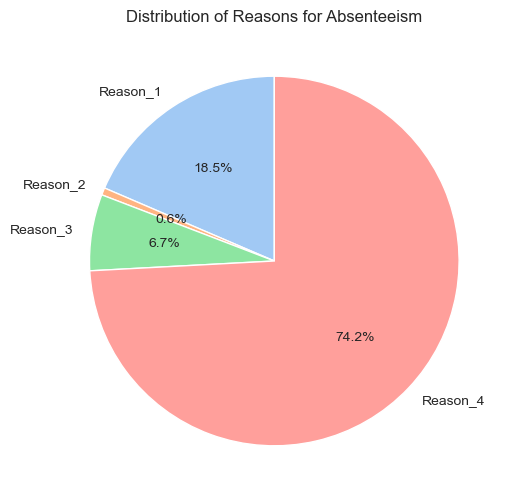

In [87]:
reason_counts = df_cleaned[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']].sum()
labels = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
plt.figure(figsize=(10, 6))
plt.pie(reason_counts, labels=labels, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.title('Distribution of Reasons for Absenteeism')
plt.show()


<Axes: xlabel='Reason_1', ylabel='Absenteeism Time in Hours'>

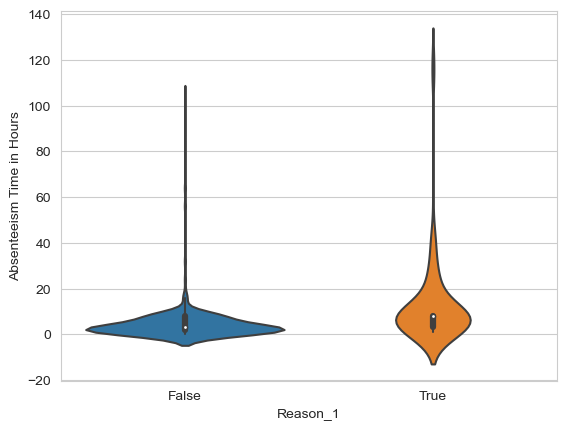

In [88]:
sns.violinplot(x='Reason_1', y='Absenteeism Time in Hours', data=df_cleaned)

<Axes: xlabel='Age', ylabel='Absenteeism Time in Hours'>

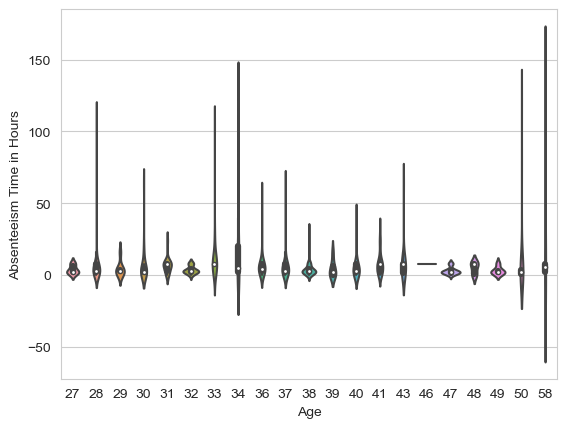

In [89]:
sns.violinplot(x='Age', y='Absenteeism Time in Hours', data=df_cleaned)